In [333]:
#Dependcies 

from sklearn import *
from sklearn.model_selection import GroupKFold
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_curve


In [334]:
#Read the dataset 
df1=pd.read_csv("new_df1.csv")
df2=pd.read_csv("TeamPitchMLB2023.csv")
df1=df1.fillna(0)
df1



,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,BB9,SO9,SO:W,LOB,PLAYOFFS,YEAR,BABIP,AB,SF,PA
0,Atlanta Braves,23,25.8,5.07,65,97,0.401,4.58,162,162,...,3.6,5.9,1.62,1193,0.0,1990,0.313045,5504,31,0.0
1,Baltimore Orioles,21,26.2,4.34,76,85,0.472,4.04,161,161,...,3.4,4.9,1.45,1137,0.0,1990,0.284448,5410,41,0.0
2,Boston Red Sox,20,30.6,4.10,88,74,0.543,3.72,162,162,...,3.2,6.2,1.92,1184,1.0,1990,0.301275,5516,44,0.0
3,California Angels,20,28.1,4.36,80,82,0.494,3.79,162,162,...,3.4,5.8,1.74,1155,0.0,1990,0.301424,5570,45,0.0
4,Chicago Cubs,20,26.1,4.78,77,85,0.475,4.34,162,162,...,3.6,5.5,1.53,1218,0.0,1990,0.298517,5600,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,St. Louis Cardinals,32,29.4,3.93,93,69,0.574,3.79,162,162,...,3.1,7.4,2.41,1088,1.0,2022,0.291994,5351,44,0.0
964,Tampa Bay Rays,40,29.1,3.79,86,76,0.531,3.41,162,162,...,2.4,8.7,3.60,1038,1.0,2022,0.272545,5507,41,0.0
965,Texas Rangers,31,28.3,4.59,68,94,0.420,4.22,162,162,...,3.6,8.2,2.26,1140,0.0,2022,0.297496,5405,31,0.0
966,Toronto Blue Jays,33,29.7,4.19,92,70,0.568,3.87,162,162,...,2.6,8.7,3.28,1069,1.0,2022,0.298401,5476,35,0.0


In [335]:
df2.columns

Index(['Tm', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO:W', 'LOB', 'PLAYOFFS', 'YEAR', 'Py_Win%', 'AB',
       'BABIP', 'SF'],
      dtype='object')

In [336]:
df1["Runs_Allowed_Per_9"]=(df1["R"]/9)
df2["Runs_Allowed_Per_9"]=(df2["R"]/9)




In [337]:
df2.columns

Index(['Tm', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO:W', 'LOB', 'PLAYOFFS', 'YEAR', 'Py_Win%', 'AB',
       'BABIP', 'SF', 'Runs_Allowed_Per_9'],
      dtype='object')

In [338]:
df1[["ERA",'Runs_Allowed_Per_9',
     "W-L%","WHIP","SO:W","H9","FIP","SV","tSho",'BABIP','CG']].describe()

,ERA,Runs_Allowed_Per_9,W-L%,WHIP,SO:W,H9,FIP,SV,tSho,BABIP,CG
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,4.266663,81.931359,0.500001,1.364626,2.182831,8.965806,4.273533,40.449380,9.009298,0.421277,6.309917
std,0.558922,10.650369,0.073136,0.100127,0.507736,0.645050,0.448934,7.682527,3.875375,0.800999,5.373825
min,2.800000,49.777778,0.265000,1.048000,1.160000,6.900000,3.170000,20.000000,0.000000,0.244411,0.000000
25%,3.840000,74.527778,0.447000,1.294750,1.800000,8.500000,3.950000,35.000000,6.000000,0.287104,2.000000
50%,4.230000,81.666667,0.500000,1.364000,2.135000,9.000000,4.265000,41.000000,9.000000,0.298045,5.000000
75%,4.650000,89.250000,0.556000,1.437000,2.472500,9.400000,4.590000,46.000000,11.000000,0.307623,9.000000
max,6.380000,122.555556,0.716000,1.733000,3.980000,10.800000,5.830000,68.000000,24.000000,12.722892,29.000000


In [369]:
#Sort the dataframe 
df1=df1.sort_values(by=["ERA"])
df1

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,SO9,SO:W,LOB,PLAYOFFS,YEAR,BABIP,AB,SF,PA,Runs_Allowed_Per_9
951,Los Angeles Dodgers,31,28.8,3.17,111,51,0.685,2.80,162,162,...,9.1,3.60,1015,1.0,2022,0.248386,5445,45,0.0,57.000000
948,Houston Astros,22,29.4,3.20,106,56,0.654,2.90,162,162,...,9.5,3.33,1017,1.0,2022,0.247430,5593,54,0.0,57.555556
753,St. Louis Cardinals,23,28.2,3.24,100,62,0.617,2.94,162,162,...,8.2,2.79,1215,1.0,2015,0.303387,5484,42,0.0,58.333333
921,Los Angeles Dodgers,39,28.8,3.46,106,56,0.654,3.01,162,162,...,9.9,3.29,1063,1.0,2021,0.247709,5526,53,0.0,62.333333
628,Philadelphia Phillies,23,29.2,3.27,102,60,0.630,3.02,162,162,...,7.9,3.22,1109,1.0,2011,0.285850,5579,38,0.0,58.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Texas Rangers,25,28.5,5.98,73,89,0.451,5.71,162,162,...,6.0,1.60,1186,0.0,2001,0.317057,5685,55,0.0,107.555556
149,Minnesota Twins,22,25.7,6.17,56,88,0.389,5.76,144,144,...,5.6,1.48,1007,0.0,1995,0.306855,5005,36,0.0,98.777778
910,Baltimore Orioles,42,28.1,5.90,52,110,0.321,5.84,162,162,...,7.9,2.19,1103,0.0,2021,0.316583,5429,43,0.0,106.222222
257,Colorado Rockies,18,28.9,6.35,72,90,0.444,6.01,162,162,...,6.5,1.40,1259,0.0,1999,0.325545,5717,46,0.0,114.222222


In [340]:
#Columns to group by 
# ["ERA",'Runs_Allowed_Per_9',"W-L%","WHIP","SO:W","H9","FIP","SV","tSho",'BABIP','CG'])

ERA=df1["ERA"].groupby(df1["Tm"]).mean()
RA_9=df1["Runs_Allowed_Per_9"].groupby(df1["Tm"]).mean()
Win_Loss=df1["W-L%"].groupby(df1["Tm"]).mean()
WHIP=df1["WHIP"].groupby(df1["Tm"]).mean()
SV=df1["SO:W"].groupby(df1["Tm"]).mean()
tSho=df1["tSho"].groupby(df1["Tm"]).mean()
BABIP=df1["BABIP"].groupby(df1["Tm"]).mean()
CG=df1["CG"].groupby(df1["Tm"]).mean()

#Sort the values 
ERA=ERA.sort_values()
RA_9=RA_9.sort_values()
Win_Loss=Win_Loss.sort_values()
WHIP=WHIP.sort_values()
SV=SV.sort_values()
tSho=tSho.sort_values()
BABIP=BABIP.sort_values()
CG=CG.sort_values()

RA_9

Tm
Cleveland Guardians              70.444444
Los Angeles Dodgers              70.767677
Atlanta Braves                   73.306397
Tampa Bay Rays                   73.503704
St. Louis Cardinals              76.094276
New York Mets                    77.245791
Houston Astros                   77.346801
San Francisco Giants             77.602694
Los Angeles Angels of Anaheim    77.767677
Montreal Expos                   78.288889
New York Yankees                 79.239057
Chicago Cubs                     79.855219
San Diego Padres                 80.464646
Washington Nationals             80.512346
Oakland Athletics                80.542088
California Angels                80.888889
Miami Marlins                    81.090909
Philadelphia Phillies            81.787879
Boston Red Sox                   81.952862
Cleveland Indians                82.166667
Seattle Mariners                 82.558923
Cincinnati Reds                  82.747475
Toronto Blue Jays                82.764310
Arizona 

In [341]:
#Remove Outliers 
# plt.boxplot(df1["ERA"])
# plt.boxplot(df1["RA/G"])
# plt.boxplot(df1["WHIP"])
# plt.boxplot(df1["SO9"])
# plt.boxplot(df1["H9"])

columns =['CG',"ERA","W-L%","WHIP","SO:W","H9","FIP","SV","tSho",'BABIP','CG']

for column in columns: 
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    IQR=Q3-Q1

    upper=Q3+1.75*IQR
    lower=Q1-1.75*IQR

    df1=df1[(df1[column] >=lower) | (df1[column]<= upper)]

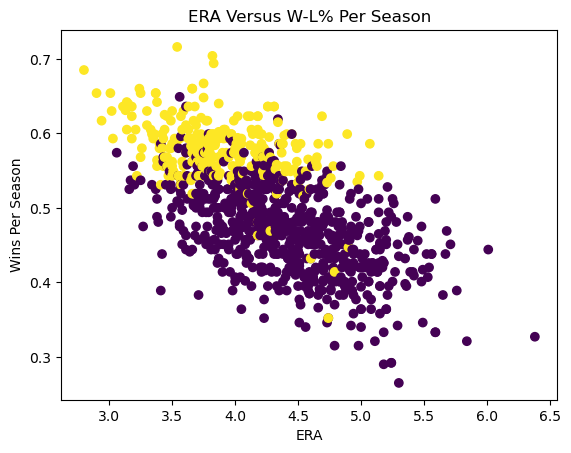

In [342]:
#Let's Find Some Significant Values by applying scater plots for different variables 
plt.scatter(df1["ERA"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("ERA")
plt.ylabel("Wins Per Season")
plt.title("ERA Versus W-L% Per Season")
plt.show()



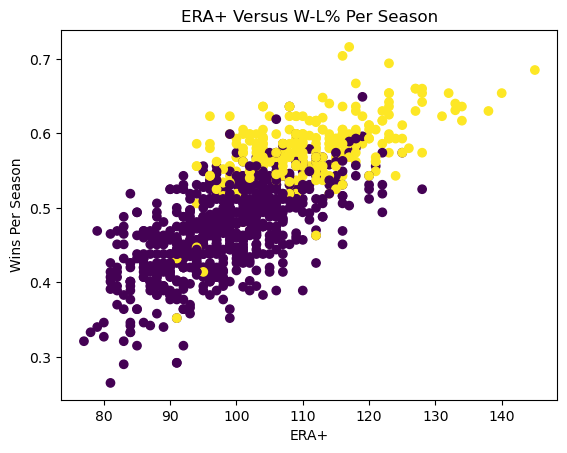

In [343]:
plt.scatter(df1["ERA_Plus"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("ERA+")
plt.ylabel("Wins Per Season")
plt.title("ERA+ Versus W-L% Per Season")
plt.show()

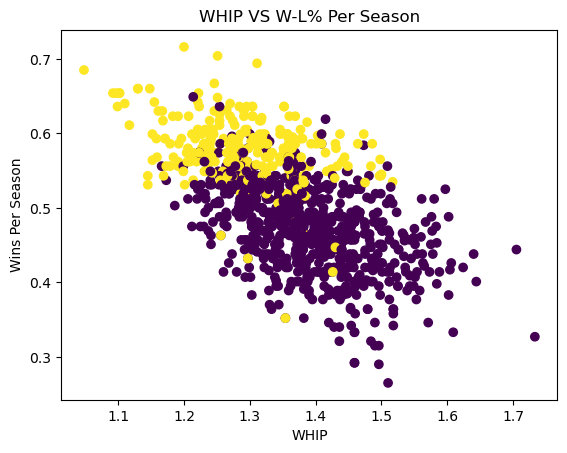

In [344]:
plt.scatter(df1["WHIP"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("WHIP")
plt.ylabel("Wins Per Season")
plt.title("WHIP VS W-L% Per Season")
plt.show()


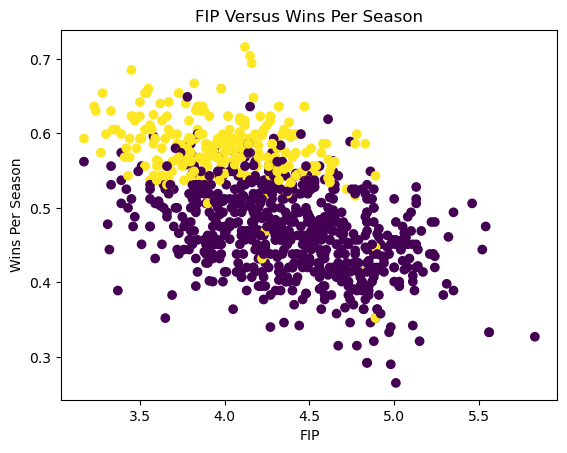

In [345]:
plt.scatter(df1["FIP"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("FIP")
plt.ylabel("Wins Per Season")
plt.title("FIP Versus Wins Per Season")
plt.show()


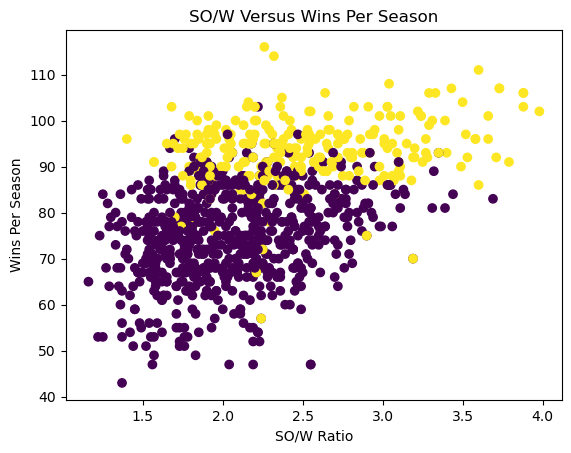

In [346]:
plt.scatter(df1["SO:W"], df1["W"], c=df1['PLAYOFFS'])
plt.xlabel("SO/W Ratio")
plt.ylabel("Wins Per Season")
plt.title("SO/W Versus Wins Per Season")
plt.show()


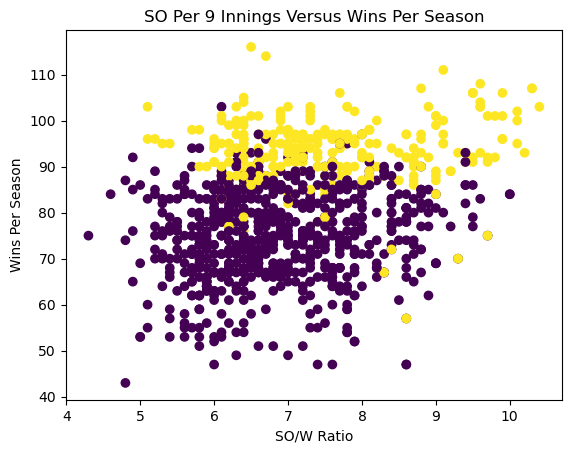

In [347]:
plt.scatter(df1["SO9"], df1["W"], c=df1['PLAYOFFS'])
plt.xlabel("SO/W Ratio")
plt.ylabel("Wins Per Season")
plt.title("SO Per 9 Innings Versus Wins Per Season")
plt.show()

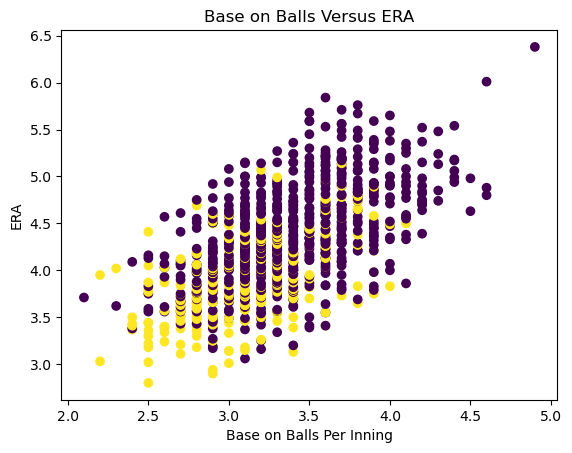

In [348]:
plt.scatter(df1["BB9"], df1["ERA"], c=df1['PLAYOFFS'])
plt.xlabel("Base on Balls Per Inning")
plt.ylabel("ERA")
plt.title("Base on Balls Versus ERA")
plt.show()

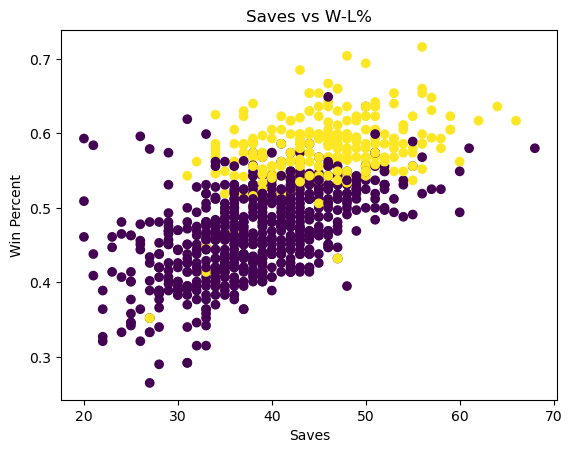

In [349]:
plt.scatter(df1["SV"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Saves")
plt.ylabel("Win Percent")
plt.title("Saves vs W-L%")
plt.show()

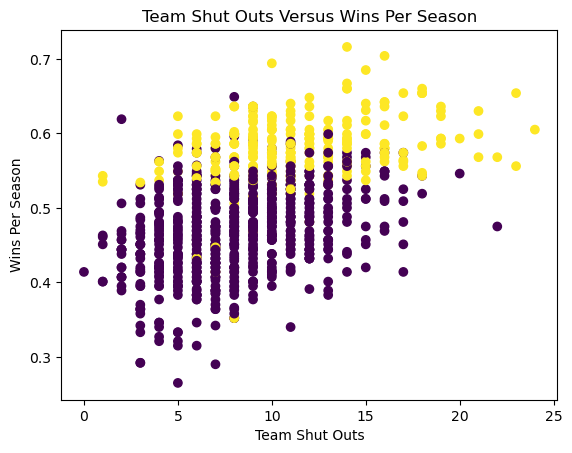

In [350]:
#'H9', 'HR9',

plt.scatter(df1["tSho"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Team Shut Outs")
plt.ylabel("Wins Per Season")
plt.title("Team Shut Outs Versus Wins Per Season")
plt.show()

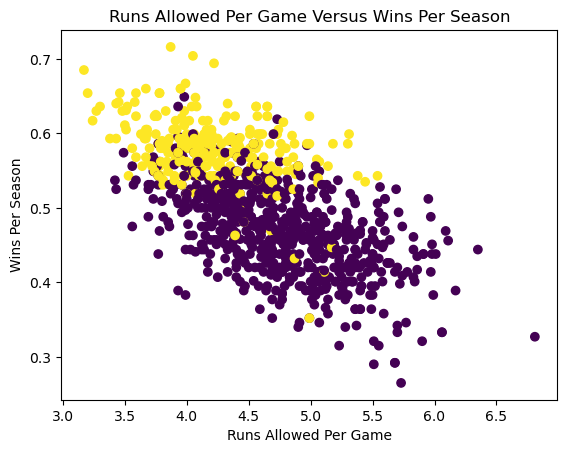

In [351]:
plt.scatter(df1["RA/G"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Runs Allowed Per Game")
plt.ylabel("Wins Per Season")
plt.title("Runs Allowed Per Game Versus Wins Per Season")
plt.show()

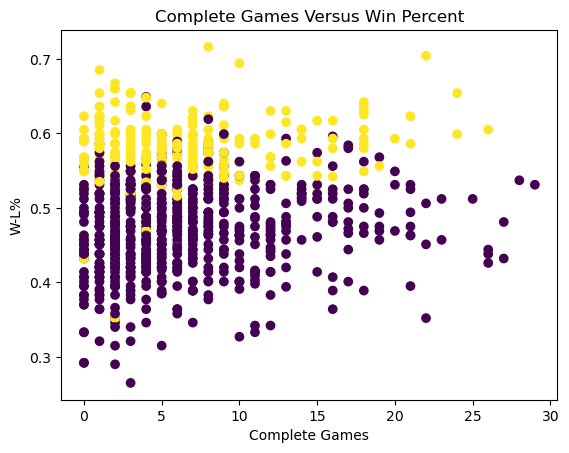

In [352]:
plt.scatter(df1["CG"], df1["W-L%"], c=df1['PLAYOFFS'])
plt.xlabel("Complete Games")
plt.ylabel("W-L%")
plt.title("Complete Games Versus Win Percent")
plt.show()

In [353]:
#Apply Logistic Regression and/or GNB For the pitching dataset
#colums to save  "BB9", "SO9",'HR9'
inputs=df1[["ERA","W-L%","WHIP","SO:W","H9","FIP","SV","tSho",'BABIP','CG']]
# inputs=df1[["ERA","H9","HR9", "SO9", "BB9", "RA/G"]]
target=df1["PLAYOFFS"]
# X_train, X_test, y_train,y_test=train_test_split(inputs,target,train_size=0.7)

LogReg=LogisticRegression(penalty='l2', solver='liblinear',fit_intercept=False)
GNB=GaussianNB()
DT=DecisionTreeClassifier(ccp_alpha=0.034621,criterion='entropy',random_state=33, max_depth=7,
                          min_samples_leaf=1)
SVM=SVC()
KNN=KNeighborsClassifier(n_neighbors=8,algorithm='auto')

In [354]:
#Fit The Model To The Training Set
# model1=LogReg.fit(X_train,y_train)
# model2=GNB.fit(X_train,y_train)
# model3=DT.fit(X_train,y_train)

model1=LogReg.fit(inputs,target)
model2=GNB.fit(inputs,target)
model3=SVM.fit(inputs,target)
model4=KNN.fit(inputs,target)
model5=DT.fit(inputs,target)

In [355]:
#Predict The Model

# y_pred1=model1.predict(X_test)
# y_pred2=model2.predict(X_test)
# y_pred3=model3.predict(X_test)

# y_pred1=model1.predict(target)
# y_pred2=model2.predict(target)
# y_pred3=mdoel3.predict(target)


In [356]:
# #Check The Accuracy of the model 
# print("Logistic Regression Score: ", accuracy_score(y_pred1,y_test))
# print("GNB Regression Score: ", accuracy_score(y_pred2,y_test))
# print("Decision Tree Score: ", accuracy_score(y_pred3,y_test))





In [357]:
#Get the Summary for the model

In [358]:
#Test Our Model for The 2023 Pitching Dataset.
# First, let's describe the independent values in the 2023 dataset
# df2[["ERA","FIP","WHIP","SO/W", "SO9","HR9"]].groupby(df2["Tm"]).describe()

In [359]:
# inputs2=df2[["ERA","WHIP","SO/W","H9","FIP","SV","tSho","SO9","BB9"]]
inputs2=df2[["ERA","W-L%","WHIP","SO:W","H9","FIP","SV","tSho",'BABIP','CG']]
# inputs2=df2[["ERA","H9","HR9", "SO9", "BB9", "RA/G"]]
target2=df2["PLAYOFFS"]


In [360]:
# #Fit model1 to the datset
results=model1.predict(inputs2)
results2=model2.predict(inputs2)
results3=model3.predict(inputs2)
results4=model4.predict(inputs2)
results5=model5.predict(inputs2)

In [361]:
#Accuracy Score 
print("LogReg Score: ",accuracy_score(results, target2))
print("GNB Score: ",accuracy_score(results2,target2))
print("SVM Score ",accuracy_score(results3,target2))
print("KNN Score ",accuracy_score(results4,target2))
print("DT Score ",accuracy_score(results5,target2))



LogReg Score:  0.8
GNB Score:  0.8
SVM Score  0.7
KNN Score  0.7
DT Score  0.9


In [362]:
df1_values_sorted=df1.sort_values(by=["W-L%"], ascending=False)
df1

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,SO9,SO:W,LOB,PLAYOFFS,YEAR,BABIP,AB,SF,PA,Runs_Allowed_Per_9
951,Los Angeles Dodgers,31,28.8,3.17,111,51,0.685,2.80,162,162,...,9.1,3.60,1015,1.0,2022,0.248386,5445,45,0.0,57.000000
948,Houston Astros,22,29.4,3.20,106,56,0.654,2.90,162,162,...,9.5,3.33,1017,1.0,2022,0.247430,5593,54,0.0,57.555556
753,St. Louis Cardinals,23,28.2,3.24,100,62,0.617,2.94,162,162,...,8.2,2.79,1215,1.0,2015,0.303387,5484,42,0.0,58.333333
921,Los Angeles Dodgers,39,28.8,3.46,106,56,0.654,3.01,162,162,...,9.9,3.29,1063,1.0,2021,0.247709,5526,53,0.0,62.333333
628,Philadelphia Phillies,23,29.2,3.27,102,60,0.630,3.02,162,162,...,7.9,3.22,1109,1.0,2011,0.285850,5579,38,0.0,58.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Texas Rangers,25,28.5,5.98,73,89,0.451,5.71,162,162,...,6.0,1.60,1186,0.0,2001,0.317057,5685,55,0.0,107.555556
149,Minnesota Twins,22,25.7,6.17,56,88,0.389,5.76,144,144,...,5.6,1.48,1007,0.0,1995,0.306855,5005,36,0.0,98.777778
910,Baltimore Orioles,42,28.1,5.90,52,110,0.321,5.84,162,162,...,7.9,2.19,1103,0.0,2021,0.316583,5429,43,0.0,106.222222
257,Colorado Rockies,18,28.9,6.35,72,90,0.444,6.01,162,162,...,6.5,1.40,1259,0.0,1999,0.325545,5717,46,0.0,114.222222


[Text(0.4, 0.8333333333333334, 'X[1] <= 0.532\nentropy = 0.853\nsamples = 968\nvalue = [699, 269]'),
 Text(0.2, 0.5, 'entropy = 0.186\nsamples = 634\nvalue = [616, 18]'),
 Text(0.6, 0.5, 'X[1] <= 0.579\nentropy = 0.809\nsamples = 334\nvalue = [83, 251]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.967\nsamples = 178\nvalue = [70, 108]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.414\nsamples = 156\nvalue = [13, 143]')]

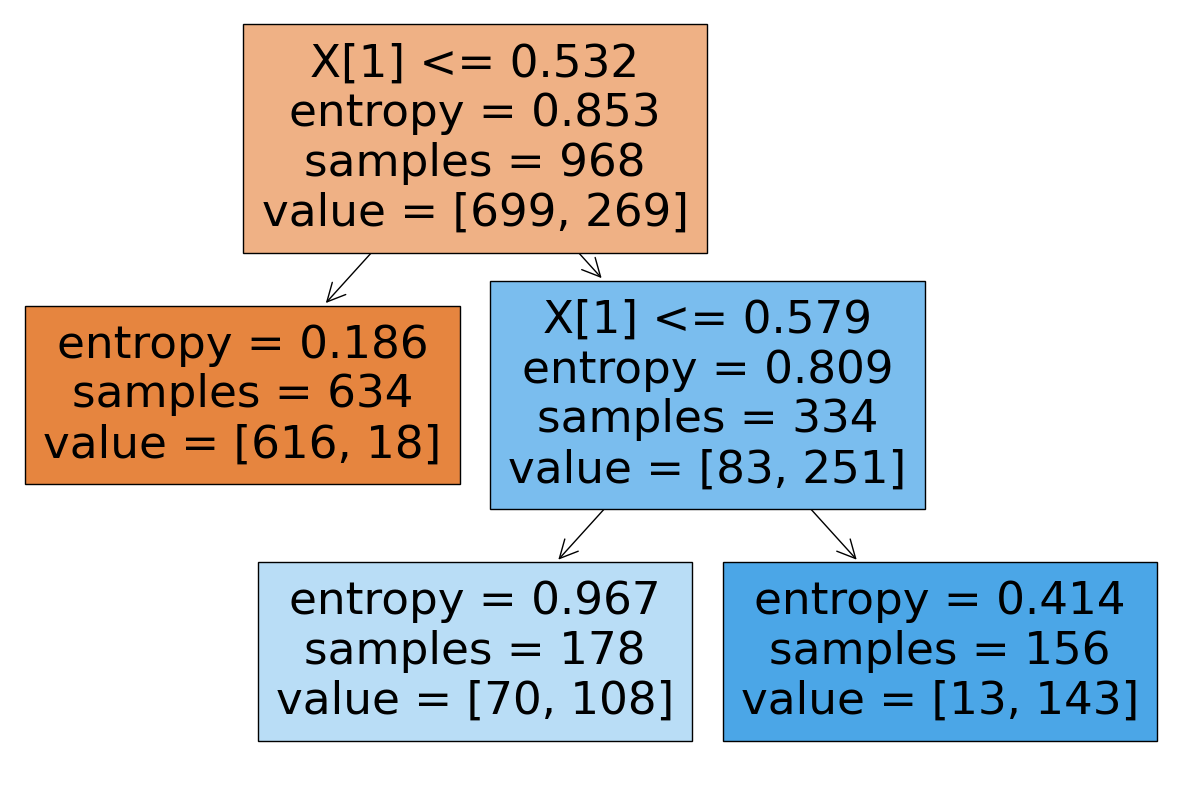

In [363]:
# Prune the decision tree 
# Plot The Decision Tree first  
plt.figure(figsize=(15,10))
tree.plot_tree(model5,filled=True)

In [364]:
# Get the appropriate ccc_alpha value for pruning the decision tree
# Get cc_alpha score for the Decsion Tree model
path=model5.cost_complexity_pruning_path(inputs,target)
ccp_alphas,impurities=path.ccp_alphas,path.impurities 

In [365]:
results_DT=[]
for ccp_alpha in ccp_alphas: 
    result_DT=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    result_DT.fit(inputs,target)
    results_DT.append(result_DT)

alphas:  [0.         0.00206612 0.00218938 0.00227965 0.00249714 0.00274378
 0.00284596 0.00314274 0.00339562 0.0035654  0.00402906 0.00405143
 0.00406863 0.00413223 0.00419797 0.00422203 0.00423535 0.00439215
 0.00442106 0.00470967 0.00480597 0.00487866 0.00525967 0.00642928
 0.0068156  0.00705193 0.01058602 0.0168923  0.02005983 0.03462109
 0.45146903]


 impurities:  [0.14485949 0.14692561 0.14911499 0.15139464 0.15638893 0.15913271
 0.16197867 0.16512141 0.16851703 0.17564783 0.17967689 0.18777975
 0.19998564 0.20411787 0.20831584 0.21253786 0.21677321 0.22116537
 0.22558642 0.23971544 0.24932738 0.2590847  0.26434437 0.27077365
 0.28440485 0.29145677 0.31262881 0.34641342 0.36647325 0.40109433
 0.85256336]


Text(0.5, 1.0, 'CCP Alphas vs Impuritites')

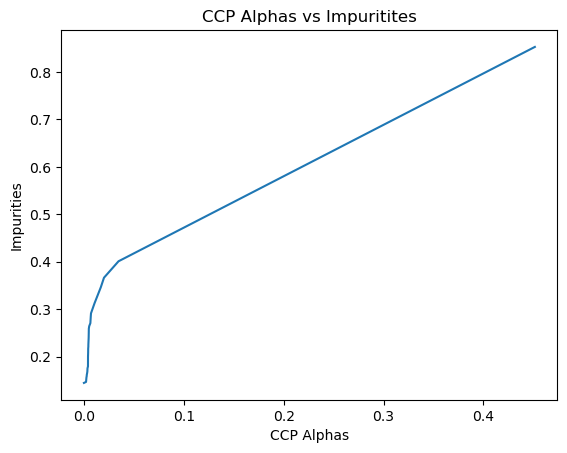

In [366]:
print("alphas: ",ccp_alphas)
print("\n\n impurities: ", impurities)

plt.plot(ccp_alphas, impurities,)
plt.xlabel("CCP Alphas")
plt.ylabel("Impurities")
plt.title("CCP Alphas vs Impuritites")

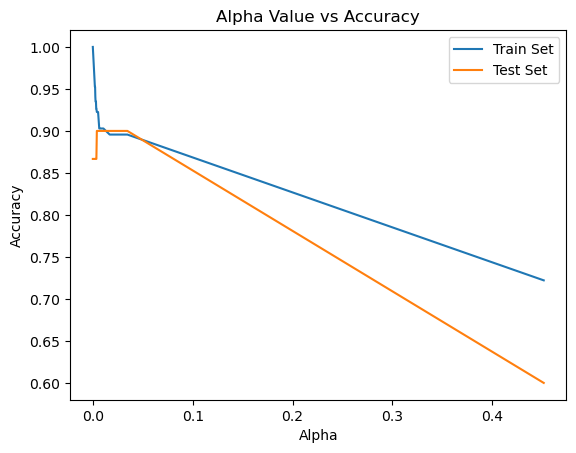

In [367]:
# Plot Accuracy Scores vs CCC_Alpha parameter 
train_scores=[result_DT.score(inputs,target) for result_DT in results_DT]
test_scores=[result_DT.score(inputs2,target2) for result_DT in results_DT]
tree_depths=[result_DT.tree_.max_depth for result_DT in results_DT]

fig,ax=plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha Value vs Accuracy")

ax.plot(ccp_alphas, train_scores, label="Train Set")
ax.plot(ccp_alphas,test_scores, label="Test Set")
ax.legend()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,0.002066,0.002189,0.002280,0.002497,0.002744,0.002846,0.003143,0.003396,0.003565,...,0.004879,0.00526,0.006429,0.006816,0.007052,0.010586,0.016892,0.02006,0.034621,0.451469
1,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,...,0.900000,0.90000,0.900000,0.900000,0.900000,0.900000,0.900000,0.90000,0.900000,0.600000


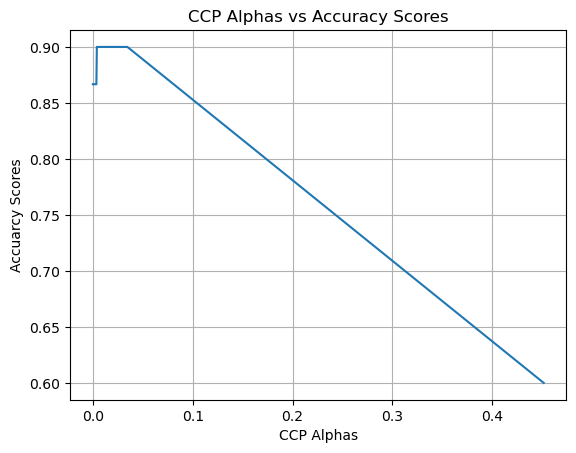

In [368]:
# Make a for loop to find the appropriate decision tree model

acc_scores=[accuracy_score(target2,result_DT.predict(inputs2)) for result_DT in results_DT]

#Plot the Scores 
plt.plot(ccp_alphas,acc_scores)
plt.grid()
plt.xlabel("CCP Alphas")
plt.ylabel("Accuarcy Scores")
plt.title("CCP Alphas vs Accuracy Scores")

alpha_accscore=pd.DataFrame([ccp_alphas,acc_scores]) 
alpha_accscore    